<a href="https://colab.research.google.com/github/grbarbosa3/Machine_learning/blob/master/Alura_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install jupyterthemes

In [ ]:
#!jt -r

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
df = pd.read_csv(r"C:\Users\grbar\Downloads\BancoDeDados.csv")

In [ ]:
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [ ]:
# g = sns.countplot(x='preco', data=df, orient='h')
# g.set_title("Distribuição do estado dos clientes", fontsize=20)
# g.set_xlabel("Estado", fontsize=17)
# g.set_ylabel("Contagem", fontsize=17)
# g.set_xticklabels(g.get_xticklabels(),rotation=45)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

# Analise exploratória

In [ ]:
df['cidade_vendedor'].value_counts()

sao paulo                29056
ibitinga                  8331
santo andre               3146
curitiba                  3125
sao jose do rio preto     2687
                         ...  
irece                        1
serra redonda                1
campanha                     1
mogi das cruzes / sp         1
palotina                     1
Name: cidade_vendedor, Length: 604, dtype: int64

In [ ]:
def plot_perc(st,dados):
    plt.figure(figsize=(20,8))
    
    g = sns.countplot(x= st, data=dados, orient='h')
    g.set_ylabel('Contagem', fontsize=17)
    
    sizes = []
    
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x() + p.get_width()/1.6,
              height+200,
              '{:1.2f}%'.format(height / 116581*100),
              ha = 'center', va = 'bottom', fontsize=12)
        g.set_ylim(0,max(sizes)*1.1)
    
    

In [ ]:
df_gastos = df[['estado_cliente', 'preco']]

##### Plot indicando qual estado tem maior valor de PREÇO

[Text(0, 0, 'SP'),
 Text(1, 0, 'PA'),
 Text(2, 0, 'RS'),
 Text(3, 0, 'RJ'),
 Text(4, 0, 'SC'),
 Text(5, 0, 'MG'),
 Text(6, 0, 'MT'),
 Text(7, 0, 'BA'),
 Text(8, 0, 'ES'),
 Text(9, 0, 'PR'),
 Text(10, 0, 'MS'),
 Text(11, 0, 'CE'),
 Text(12, 0, 'RN'),
 Text(13, 0, 'TO'),
 Text(14, 0, 'MA'),
 Text(15, 0, 'GO'),
 Text(16, 0, 'PI'),
 Text(17, 0, 'PE'),
 Text(18, 0, 'DF'),
 Text(19, 0, 'PB'),
 Text(20, 0, 'AL'),
 Text(21, 0, 'SE'),
 Text(22, 0, 'RO'),
 Text(23, 0, 'AC'),
 Text(24, 0, 'RR'),
 Text(25, 0, 'AM'),
 Text(26, 0, 'AP')]

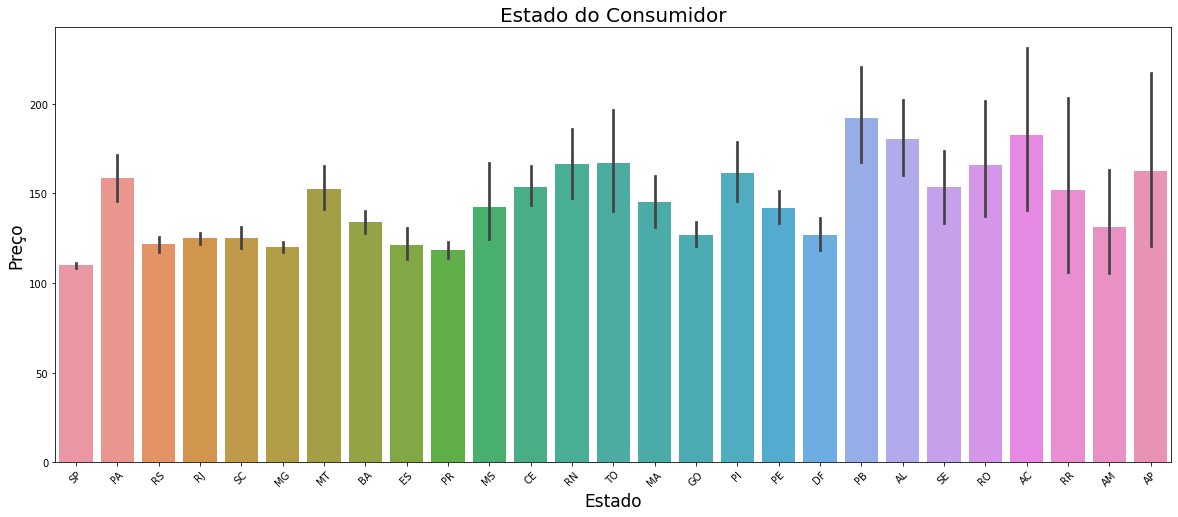

In [ ]:
plt.figure(figsize=(20,8))
g2 = sns.barplot(x='estado_cliente', y='preco',
                 data=df[df['preco'] != -1])
g2.set_title("Estado do Consumidor", fontsize=20)
g2.set_xlabel("Estado", fontsize=17)
g2.set_ylabel("Preço", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

##### Plot indicando qual estado tem maior valor de FRETE

[Text(0, 0, 'SP'),
 Text(1, 0, 'PA'),
 Text(2, 0, 'RS'),
 Text(3, 0, 'RJ'),
 Text(4, 0, 'SC'),
 Text(5, 0, 'MG'),
 Text(6, 0, 'MT'),
 Text(7, 0, 'BA'),
 Text(8, 0, 'ES'),
 Text(9, 0, 'PR'),
 Text(10, 0, 'MS'),
 Text(11, 0, 'CE'),
 Text(12, 0, 'RN'),
 Text(13, 0, 'TO'),
 Text(14, 0, 'MA'),
 Text(15, 0, 'GO'),
 Text(16, 0, 'PI'),
 Text(17, 0, 'PE'),
 Text(18, 0, 'DF'),
 Text(19, 0, 'PB'),
 Text(20, 0, 'AL'),
 Text(21, 0, 'SE'),
 Text(22, 0, 'RO'),
 Text(23, 0, 'AC'),
 Text(24, 0, 'RR'),
 Text(25, 0, 'AM'),
 Text(26, 0, 'AP')]

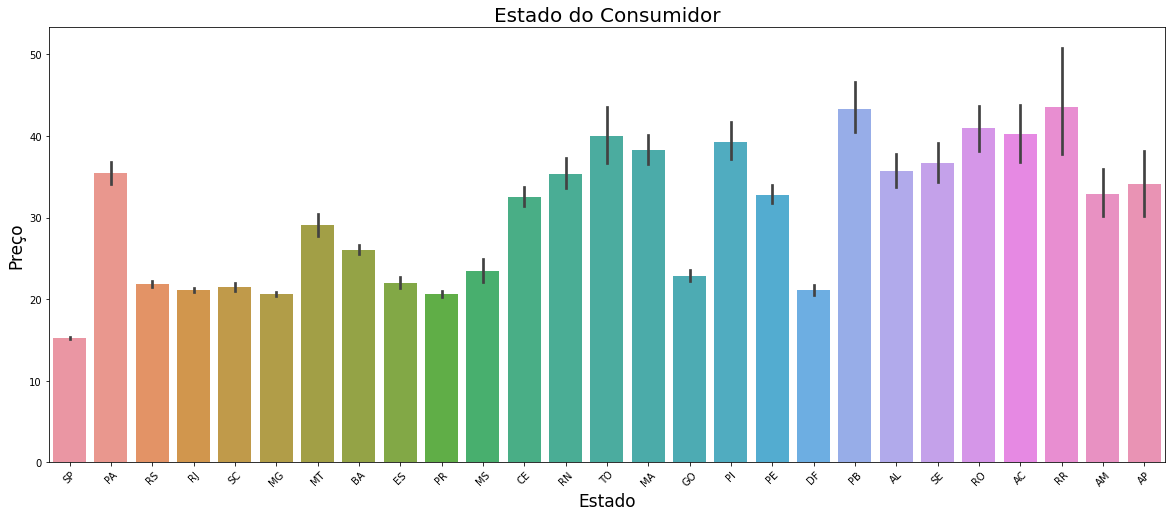

In [ ]:
plt.figure(figsize=(20,8))
g3 = sns.barplot(x='estado_cliente', y='frete',
                 data=df[df['frete'] != -1])
g3.set_title("Estado do Consumidor", fontsize=20)
g3.set_xlabel("Estado", fontsize=17)
g3.set_ylabel("Preço", fontsize=17)
g3.set_xticklabels(g2.get_xticklabels(),rotation=45)

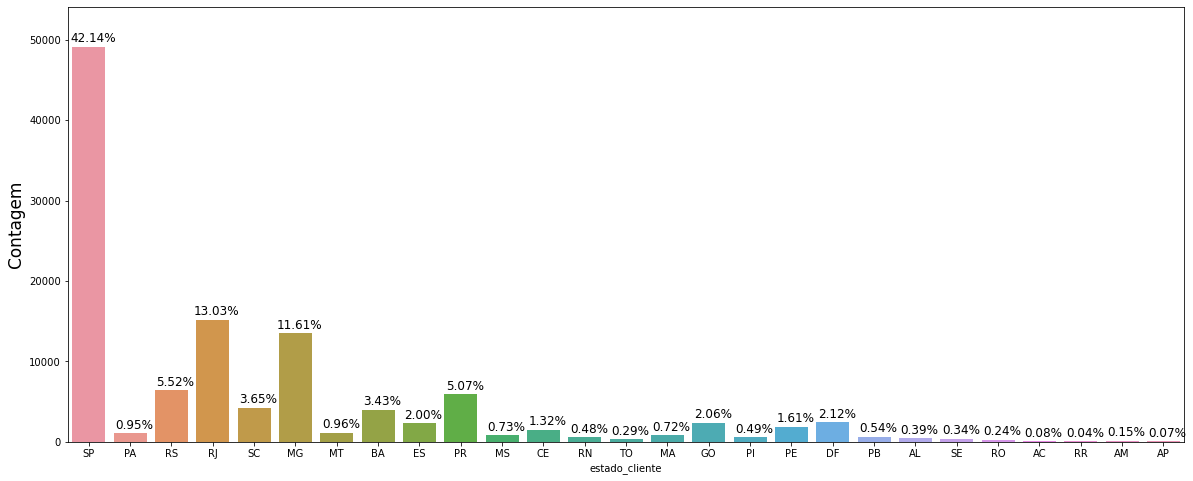

In [ ]:
plot_perc('estado_cliente',df)

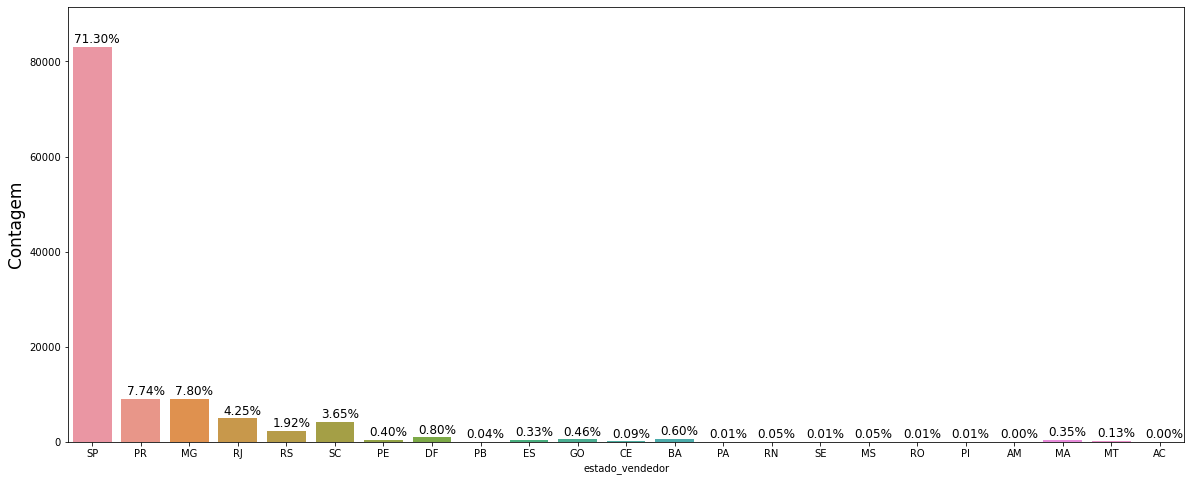

In [ ]:
plot_perc('estado_vendedor',df)

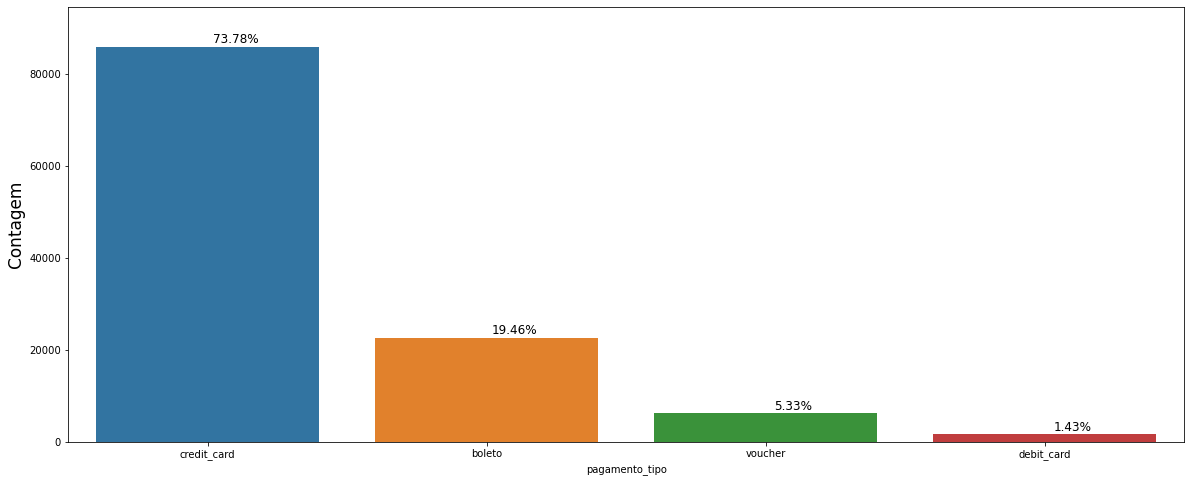

In [ ]:
plot_perc('pagamento_tipo',df)

#### Mapa de calor para distribuição de valores de frete em função da localização do cliente e do vendedor:

In [ ]:
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

In [ ]:
df.loc[df['estado_cliente'].isin(sudeste), 'Regiao'] = 'Sudeste'
df.loc[df['estado_cliente'].isin(nordeste), 'Regiao'] = 'Nordeste'
df.loc[df['estado_cliente'].isin(norte), 'Regiao'] = 'Norte'
df.loc[df['estado_cliente'].isin(centro_oeste), 'Regiao'] = 'Centro-Oeste'
df.loc[df['estado_cliente'].isin(sul), 'Regiao'] = 'Sul'

In [ ]:
def mapa_calor(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("blue", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]],
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [ ]:
mapa_calor(df[df['preco'] != -1], ['estado_vendedor', 'Regiao'], 
              values=df[df['preco'] != -1]['frete'], aggfunc='mean')

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
estado_vendedor,,,,,
AC,nan,nan,nan,32.840000,nan
AM,nan,28.255000,nan,25.290000,nan
BA,29.977381,22.736355,46.290476,33.618110,39.643671
CE,65.456667,29.744054,85.614000,47.044130,51.445556
DF,13.022231,27.532778,58.371935,19.654101,27.076867
ES,36.895833,38.183269,60.022857,28.753852,39.894510
GO,14.573721,33.369841,26.595909,23.764630,30.426667
MA,27.150192,19.453333,28.859000,31.880362,42.660652
MG,26.980406,34.144730,41.923133,21.278114,28.976495


###### Criando o dataframe de usuario e a coluna 'RECENCIA'

In [ ]:
df_olist = df[['id_unico_cliente','id_cliente','horario_pedido','item_id','preco']]

In [ ]:
df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente','DataMaxCompra']
df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])

In [ ]:
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days

In [ ]:
df_usuario = pd.merge(df_olist,df_compra[['id_unico_cliente','Recencia']], on='id_unico_cliente')

In [ ]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


# Regra do cotovelo

#### Buscar um valor otimo: baixa inércia, porem um numero nao tao grande de clusters.

In [ ]:
def calcular_wcss(data):
    wcss = []
    for k in range(1,10):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=data)
        data['Clusters']=kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [ ]:
from sklearn.cluster import KMeans

df_recencia = df_usuario[['Recencia']]

In [ ]:
soma_quadrados = calcular_wcss(df_recencia)

<ipython-input-25-af8f6bbb71cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters']=kmeans.labels_
<ipython-input-25-af8f6bbb71cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters']=kmeans.labels_
<ipython-input-25-af8f6bbb71cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

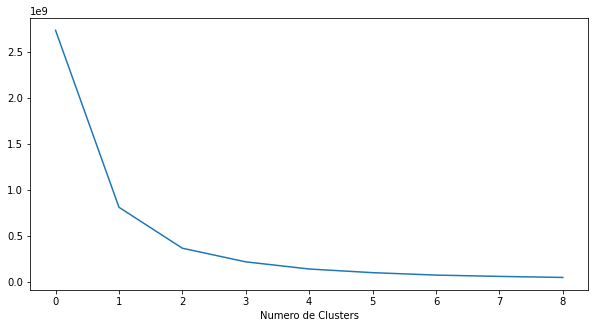

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(soma_quadrados)
plt.xlabel('Numero de Clusters')
plt.show()

###### A inércia fuciona bem em clusters redondos, mas é uma métrica ruim se seus clusters sao de formato irregular.
###### Não é uma métrica normalizada, entao se tiver muitas variaveis, pode ter problemas, já que as distancias ficam infladas.

In [ ]:
import math

def numero_otimo_clusters(wcss):
    x1, y1 = 2,wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]
    
    distancia = []
    for i in range(len(wcss)):
        
        x0 = i+2
        y0 = wcss[i]
        
        numerador = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancia.append(numerador/denominador)
        
    return distancia.index(max(distancia)) + 2

In [ ]:
n = numero_otimo_clusters(soma_quadrados)

In [ ]:
n

4

### (BONUS) Regra da silhueta para Recencia ▼
https://jyotiyadav99111.medium.com/selecting-optimal-number-of-clusters-in-kmeans-algorithm-silhouette-score-c0d9ebb11308

In [ ]:
# from sklearn.metrics import silhouette_samples, silhouette_score

# for i in range(2, 11):
#     clusterer = KMeans(n_clusters=i)
#     preds = clusterer.fit_predict(df_recencia)
#     score = silhouette_score(df_recencia, preds)
#     print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

# Clusterização

### Clusterizando RECENCIA

In [ ]:
kmeans = KMeans(n_clusters = 4)
df_usuario['RecenciaCluster'] = kmeans.fit_predict(df_recencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,2
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,0
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,0
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,2
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,3


In [ ]:
agrupado_cluster = df_usuario.groupby('RecenciaCluster')['Recencia'].mean().reset_index()
agrupado_cluster.head()

,RecenciaCluster,Recencia
0,0,319.404298
1,1,66.790878
2,2,489.787907
3,3,187.656789


In [ ]:
agrupado_cluster_ordenado = agrupado_cluster.sort_values(by='Recencia',ascending=True).reset_index(drop=True)

In [ ]:
agrupado_cluster_ordenado.head()

,RecenciaCluster,Recencia
0,1,66.790878
1,3,187.656789
2,0,319.404298
3,2,489.787907


In [ ]:
agrupado_cluster_ordenado['index'] = agrupado_cluster_ordenado.index
agrupado_cluster_ordenado.head()


,RecenciaCluster,Recencia,index
0,1,66.790878,0
1,3,187.656789,1
2,0,319.404298,2
3,2,489.787907,3


In [ ]:
juntando_cluster = pd.merge(df_usuario, agrupado_cluster_ordenado[['RecenciaCluster', 'index']], on='RecenciaCluster')
juntando_cluster.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,2,3
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,2,3
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,2,3
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,2,3
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,2,3


In [ ]:
removendo_dados = juntando_cluster.drop(['RecenciaCluster'],axis=1)
removendo_dados.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3


In [ ]:
df_final = removendo_dados.rename(columns={'index':'RecenciaCluster'})
df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3


### Função de ordenaçao: 
##### NAO ESQUECER DE MUDAR O PARAMETRO 'ASCENDING' PARA FALSE QUANDO FOR USAR COM FREQUENCIA E RECEITA!!

In [ ]:
def ordenador_cluster(cluster_nome,target_nome,df,ascending):
    agrupado_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_cluster_ordenado = agrupado_cluster.sort_values(by=target_nome,ascending=ascending).reset_index(drop=True)
    agrupado_cluster_ordenado['index'] = agrupado_cluster_ordenado.index
    juntando_cluster = pd.merge(df, agrupado_cluster_ordenado[[cluster_nome, 'index']], on=cluster_nome)
    removendo_dados = juntando_cluster.drop([cluster_nome],axis=1)
    df_final = removendo_dados.rename(columns={'index':cluster_nome})
    return df_final
    

In [ ]:
df_usuario = ordenador_cluster('RecenciaCluster', 'Recencia', df_usuario,True)

In [ ]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3


In [ ]:
df_usuario.groupby('RecenciaCluster')['Recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
RecenciaCluster,,,,,,,,
0,31790.0,66.790878,36.009443,0.0,33.0,67.0,100.0,127.0
1,33510.0,187.656789,34.961732,128.0,158.0,187.0,218.0,253.0
2,30757.0,319.404298,43.691600,254.0,281.0,313.0,356.0,404.0
3,20524.0,489.787907,59.600038,405.0,443.0,481.0,532.0,728.0


### Clusterizando FREQUENCIA

In [ ]:
df_frequencia = df.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
df_frequencia.columns = ['id_unico_cliente', 'Frequencia']
df_frequencia.head()

,id_unico_cliente,Frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [ ]:
df_usuario = pd.merge(df_usuario, df_frequencia, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1


In [ ]:
df_frequencia = df_usuario[['Frequencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1,0


In [ ]:
df_usuario = ordenador_cluster('FrequenciaCluster', 'Frequencia', df_usuario,False)

In [ ]:
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0
1,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
2,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0
3,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0


### Clusterizando RECEITA

In [ ]:
df_receita = df.groupby('id_unico_cliente').pagamento_valor.sum().reset_index()
df_receita.columns = ['id_unico_cliente', 'Receita']
df_usuario = pd.merge(df_usuario,df_receita,on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,3,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,3,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1,3,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1,3,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1,3,148.33


In [ ]:
df_receita.head()

,id_unico_cliente,Receita
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [ ]:
df_pagamento = df_usuario[['Receita']]
kmeans = KMeans(n_clusters=4)
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_pagamento)

In [ ]:
df_usuario = ordenador_cluster('ReceitaCluster','Receita',df_usuario,False)

In [ ]:
df_usuario.groupby('ReceitaCluster')['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64
1,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
2,1619.0,5650.053385,2881.999747,2951.83,3557.12,4491.44,6914.63,16313.60
3,114763.0,258.095126,364.892800,9.59,69.90,132.57,269.10,2950.16


In [ ]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,3,146.87,3
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,3,140.61,3
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1,3,142.05,3
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1,3,155.70,3
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1,3,148.33,3


#  Criando pontuação dos clientes

###### Separando um dataset 'final' com as variáveis que importam

In [ ]:
df_final = df_usuario[['id_unico_cliente','Recencia','RecenciaCluster','Frequencia','FrequenciaCluster','Receita','ReceitaCluster']]
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
116576,0a0a92112bd4c708ca5fde585afaa872,338,2,8,2,109312.64,0
116577,0a0a92112bd4c708ca5fde585afaa872,338,2,8,2,109312.64,0
116578,0a0a92112bd4c708ca5fde585afaa872,338,2,8,2,109312.64,0
116579,0a0a92112bd4c708ca5fde585afaa872,338,2,8,2,109312.64,0
116580,0a0a92112bd4c708ca5fde585afaa872,338,2,8,2,109312.64,0


In [ ]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore') # REMOVER OS WARNINGS
    
df_final['Pontuacao'] = df_usuario['RecenciaCluster'] + df_usuario['FrequenciaCluster'] + df_usuario['ReceitaCluster']
df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,3,1,3,146.87,3,9
1,3c799d181c34d51f6d44bbbc563024db,483,3,1,3,140.61,3,9
2,567ab47ca4deb92d46dbf54dce07d0a7,528,3,1,3,142.05,3,9
3,f40ab89b622248b7ca125af4b486b887,474,3,1,3,155.70,3,9
4,749943913a9851a39c9baf51877fbab6,533,3,1,3,148.33,3,9


In [ ]:
df_final['Pontuacao'].max()

9

###### Separação por segmento

In [ ]:
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuacao'] >= 1, 'Segmento'] = 'Business'
df_final.loc[df_final['Pontuacao'] >= 3, 'Segmento'] = 'Master'
df_final.loc[df_final['Pontuacao'] >= 5, 'Segmento'] = 'Premium'

In [ ]:
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao,Segmento
116576,0a0a92112bd4c708ca5fde585afaa872,338,2,8,2,109312.64,0,4,Master
116577,0a0a92112bd4c708ca5fde585afaa872,338,2,8,2,109312.64,0,4,Master
116578,0a0a92112bd4c708ca5fde585afaa872,338,2,8,2,109312.64,0,4,Master
116579,0a0a92112bd4c708ca5fde585afaa872,338,2,8,2,109312.64,0,4,Master
116580,0a0a92112bd4c708ca5fde585afaa872,338,2,8,2,109312.64,0,4,Master


In [ ]:
df_final.to_csv('RFM.csv')

# Analise visual das features clusterizadas

In [ ]:
def plot_segmento(x,y,data):
    sns.set(palette='muted',color_codes=True,style='whitegrid')
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x,
                    y=y,
                    hue='Segmento',
                    data=data,size='Segmento',
                    sizes=(50,150),
                    size_order=['Premium','Master','Business','Inativo'])
    plt.show()

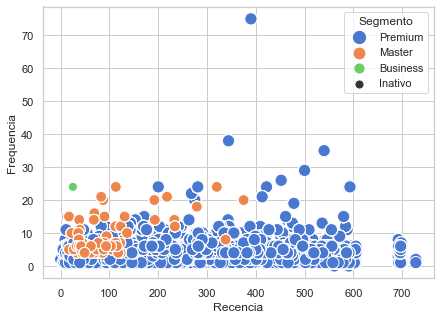

In [ ]:
plot_segmento('Recencia','Frequencia',df_final) # Aqui temos um outlier de um cliente Master que comprou bastante mas que
                                                #    faz tempo que nao compra nada. Pode se pensar em alguma promoção

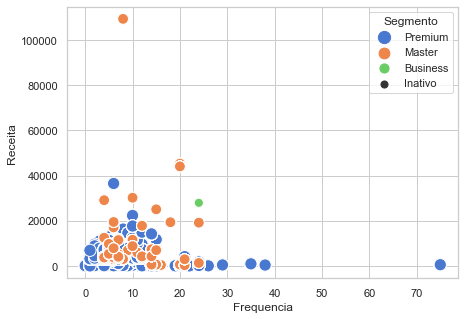

In [ ]:
plot_segmento('Frequencia', 'Receita', df_final)

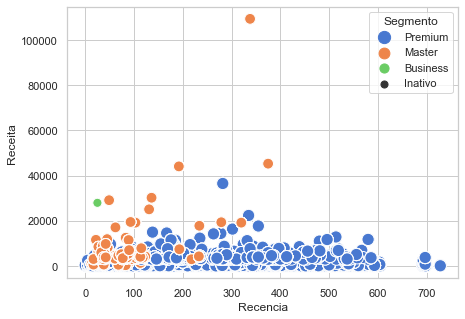

In [ ]:
plot_segmento('Recencia', 'Receita', df_final)

<AxesSubplot:xlabel='Segmento', ylabel='count'>

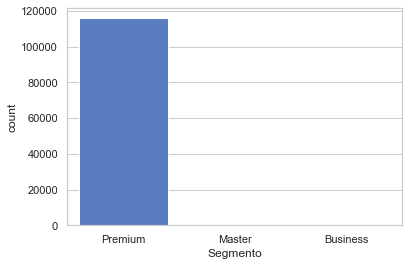

In [ ]:
sns.countplot(df_final['Segmento'])

![image.png](attachment:image.png)

In [ ]:
df_final.loc[(df_final['RecenciaCluster']==0) & (df_final['FrequenciaCluster']==3) & (df_final['ReceitaCluster']==3),'Segmento'] = 'Campeao'

df_final.loc[(df_final['RecenciaCluster']==1) & (df_final['FrequenciaCluster']==3) & (df_final['ReceitaCluster']==3),'Segmento'] = 'Fiel'

df_final.loc[(df_final['RecenciaCluster']==1) & (df_final['FrequenciaCluster']==2) & (df_final['ReceitaCluster']==2),'Segmento'] = 'Potencialmente Fiel - Tipo 1'

df_final.loc[(df_final['RecenciaCluster']==1) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==3),'Segmento'] = 'Potencialmente Fiel - Tipo 2'

df_final.loc[(df_final['RecenciaCluster']==0) & (df_final['FrequenciaCluster']==0) & (df_final['ReceitaCluster']==0),'Segmento'] = 'Novos'

df_final.loc[(df_final['RecenciaCluster']==0) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==1),'Segmento'] = 'Promissores'

df_final.loc[(df_final['RecenciaCluster']==2) & (df_final['FrequenciaCluster']==2) & (df_final['ReceitaCluster']==2),'Segmento'] = 'Precisam Atencao'

df_final.loc[(df_final['RecenciaCluster']==2) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==1),'Segmento'] ='Quase em Risco'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==2) & (df_final['ReceitaCluster']==2),'Segmento'] ='Risco'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==3) & (df_final['ReceitaCluster']==3),'Segmento'] ='Nao pode perder - Tipo 1'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==1),'Segmento'] ='Hibernando'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==0) & (df_final['ReceitaCluster']==0),'Segmento'] ='Perdidos'

In [ ]:
def agrupar(p,q,r,segmento):
    df_final.loc[(df_final['RecenciaCluster']==p) & (df_final['FrequenciaCluster']==q) & (df_final['ReceitaCluster']==r),'Segmento'] = 'segmento'

In [ ]:
agrupar(3,0,0,'Perdidos')